In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/infosys internship/dataset - 2020-09-24.csv"
)

df.head()

Mounted at /content/drive


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [6]:
# Handle missing values
df = df.fillna(0)


## REGRESSION – PLAYER GOALS PREDICTION

Select Features & Target


In [7]:
X = df[['Appearances', 'Shots', 'Passes', 'Assists']]
y = df['Goals']


Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Linear Regression Model

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [10]:
y_pred = lr.predict(X_test)


Evaluate Regression Model

In [11]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3.190366408832797
RMSE: 6.044401581186002
R2 Score: 0.754652022799987


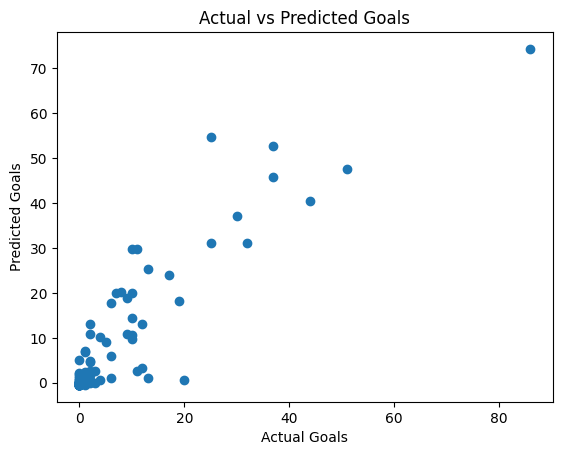

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()

## CLASSIFICATION – MATCH RESULT

Create Match Result Column

In [14]:
df['Match_Result'] = df.apply(
    lambda row: 2 if row['Wins'] > row['Losses'] else
    (1 if row['Wins'] == row['Losses'] else 0),
    axis=1
)


#Labels:

#0 → Loss, 1 → Draw, 2 → Win

Select Features & Target

In [15]:
X_cls = df[['Shots', 'Passes', 'Assists']]
y_cls = df['Match_Result']


Train-Test Split

In [16]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)


Train Logistic Regression

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xc_train, yc_train)


LogisticRegression(max_iter=1000)

Make Predictions

In [18]:
yc_pred = log_reg.predict(Xc_test)


Evaluate Classification Model

In [19]:
print("Accuracy:", accuracy_score(yc_test, yc_pred))


Accuracy: 0.6260869565217392


Confusion Matrix

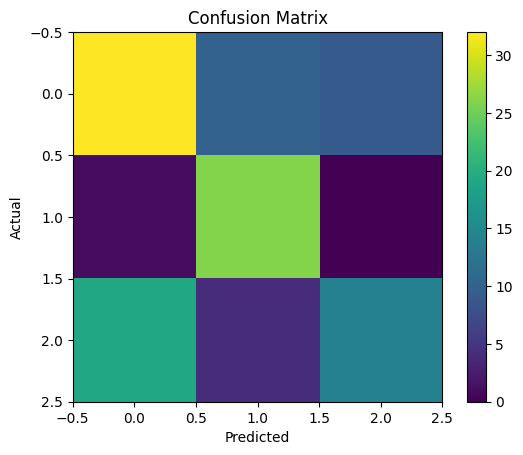

In [20]:
cm = confusion_matrix(yc_test, yc_pred, labels=[0,1,2])

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()
